In [3]:
%cd code
import pandas as pd
from stability import Stability
from main import Split

/Users/qiaochufeng/Documents/GitHub/DS596-Project/code


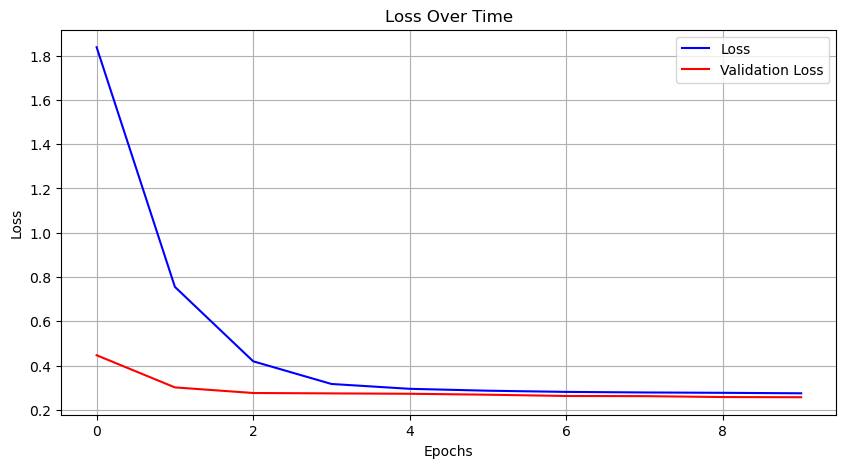

In [4]:
stability_model = Stability()
stability_model.load_data()
stability_model.prepare_features()
stability_model.train()

In [5]:
data = pd.read_csv("../data/processed/test.csv")
pdata = stability_model.predict_stabilities(data)
pdata = pdata.rename(columns={"Split Site": "Site"})
pdata

,Site,Split,Sequence,Secondary,Left Stability,Right Stability,Stability Sum
0,151,True,GEELIKENMRSKLYLEGSVNGHQFKCTHEGEGKPYEGKQTNRIKVV...,CHHHCCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEEE...,6.037887,0.898054,6.935941
1,120,False,GEELIKENMRSKLYLEGSVNGHQFKCTHEGEGKPYEGKQTNRIKVV...,CHHHCCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEEE...,6.543752,1.471591,8.015343
2,176,False,GEELIKENMRSKLYLEGSVNGHQFKCTHEGEGKPYEGKQTNRIKVV...,CHHHCCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEEE...,13.566821,0.189250,13.756071
3,154,True,VSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,CCHHHHHHCCEEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEE...,6.857693,1.494128,8.351821
4,189,False,VSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,CCHHHHHHCCEEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEE...,11.330102,0.006852,11.336954
5,54,False,VSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,CCHHHHHHCCEEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEE...,0.317220,13.571691,13.888911


In [7]:
split_processor = Split(filepath="../data/processed/under_sampled_s.csv")
split_processor.process()
accuracy, report = split_processor.train_mlp()

/opt/homebrew/Caskroom/miniforge/base/envs/cq1/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# without stability
df_test = pd.read_csv('../data/processed/test.csv')
df_test = df_test.rename(columns={"Split Site":"Site"})

x_test = df_test[['Site', 'Sequence', 'Secondary']]
y_test = df_test[['Split']].astype(int).to_numpy().flatten()
_, y_test_pred = split_processor.eval(df_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [9]:
y_test

array([1, 0, 0, 1, 0, 0])

In [10]:
y_test_pred

array([0, 0, 1, 1, 1, 0])

In [ ]:
# with stability
df_test = pdata

x_test = df_test[['Site', 'Sequence', 'Secondary', 'Stability Sum']]
y_test = df_test[['Split']].astype(int).to_numpy().flatten()
_, y_test_pred = split_processor.eval(df_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



In [9]:
y_test

array([1, 0, 0, 1, 0, 0])

In [11]:
y_test_pred

array([1, 0, 1, 0, 0, 0])

In [6]:
for i in range(6):
    print(pdata['Secondary'][i][pdata['Site'][i]])

C
E
E
E
C
C
